In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd '/content/drive/MyDrive/Colab_Notebooks/VPC_TP2'

/content/drive/MyDrive/Colab_Notebooks/VPC_TP2


In [5]:
def image_plot(images, n_row = 1, n_col = 1, fig_size = (27, 9)):
  fig = plt.figure(figsize = fig_size)
  j = 1
  ax = np.zeros(len(images))
  for i, k in zip(images, ax):
    k = fig.add_subplot(n_row, n_col,j)
    plt.imshow(i)
    k.set_title('Figura ' + str(j))
    j = j + 1

Text(0.5, 1.0, 'Imagen original')

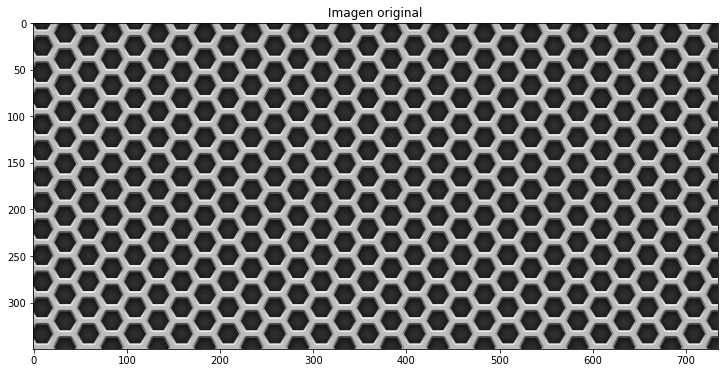

In [6]:
metalGrid = cv.imread('metalgrid.jpg', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1] # Cargo la imagen en RGB
gray = cv.cvtColor(metalGrid, cv.COLOR_RGB2GRAY) # Paso la imagen a escala de grises
fig = plt.figure(figsize=(15,6)), plt.imshow(gray, cmap = 'gray') # Grafico la imagen
plt.title('Imagen original')

In [7]:
edges = cv.Canny(gray, 275, 300, L2gradient=True)

Text(0.5, 1.0, 'Imagen luego de aplicar Canny a la original')

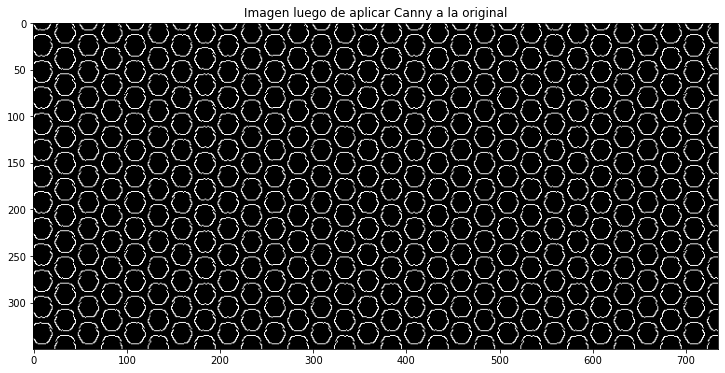

In [8]:
fig = plt.figure(figsize=(15,6)), plt.imshow(edges, cmap = 'gray')
plt.title('Imagen luego de aplicar Canny a la original')

In [9]:
img_blur = cv.blur(gray, (3, 3))

Text(0.5, 1.0, 'Imagen luego de aplicar un filtrado a la original')

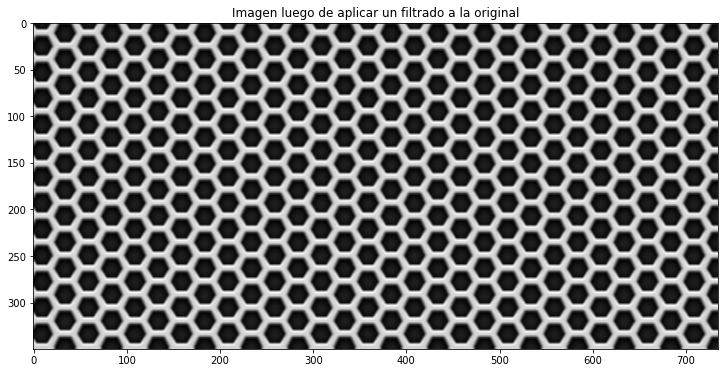

In [10]:
fig = plt.figure(figsize=(15,6)), plt.imshow(img_blur, cmap = 'gray') # Grafico la imagen
plt.title('Imagen luego de aplicar un filtrado a la original')

Text(0.5, 1.0, 'Imagen luego de aplicar Canny a la imagen filtrada')

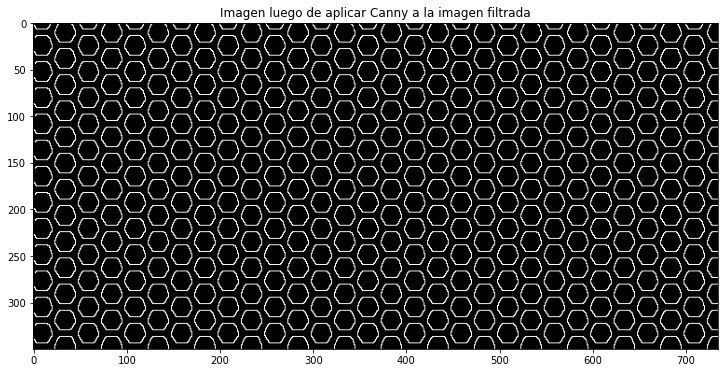

In [11]:
edges_blured = cv.Canny(img_blur, 250, 250, L2gradient=True)
fig = plt.figure(figsize=(15,6)), plt.imshow(edges_blured, cmap = 'gray') # Grafico la imagen
plt.title('Imagen luego de aplicar Canny a la imagen filtrada')

Implementación de la funcion **edge_detector**:


Argumentos:

 *img*: imagen a procesar.

 *desired_angle*: ángulo en grados que se desea detectar.

 *angle_tolerance*: tolerancia en ángulos que se permitirá para la detección de ángulos.
 
 *percentil*: valor del percentil a partir del cual se considerará la magnitud del gradiente.

In [291]:
def edge_detector(img, desired_angle, angle_tolerance, percentil, color = 'red'):
  if color not in ('red', 'green', 'blue'): raise ValueError("color must be red, green or blue.")
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY) # Paso la imagen a escala de grises
  img_blur = cv.GaussianBlur(gray, (3, 3), 0)

  # Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
  sobelx_64 = cv.Sobel(img_blur,cv.CV_32F,1,0,ksize=3)
  absx_64 = np.absolute(sobelx_64)
  sobelx_8u1 = absx_64/absx_64.max()*255
  sobelx_8u = np.uint8(sobelx_8u1)

  # De igual modo para Sobely
  sobely_64 = cv.Sobel(img_blur,cv.CV_32F,0,1,ksize=3)
  absy_64 = np.absolute(sobely_64)
  sobely_8u1 = absy_64/absy_64.max()*255
  sobely_8u = np.uint8(sobely_8u1)

  # De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
  mag = np.hypot(sobelx_8u, sobely_8u)
  mag = mag/mag.max()*255
  mag = np.uint8(mag)

  # Encontramos la Dirección y la pasamos a grados
  theta = np.arctan2(sobely_64, sobelx_64)
  angle = np.rad2deg(theta)

  cond_1 = ((angle >= (desired_angle - angle_tolerance)) & (angle < (desired_angle + angle_tolerance)))
  cond_2 = ((angle >= (desired_angle - 180 - angle_tolerance)) & (angle < (desired_angle - 180 + angle_tolerance)))
  angle_mask = cond_1 | cond_2 

  perc_val = np.percentile(mag, percentil)
  percentil_mask = mag >= perc_val

  final_mask = angle_mask & percentil_mask

  marker = 255 * np.ones(final_mask.shape, dtype = 'uint8') * final_mask
  zeros_channel = np.zeros((marker.shape), dtype = 'uint8')

  if color == 'red':  marker_img = cv.merge([marker, zeros_channel, zeros_channel])
  if color == 'green':  marker_img = cv.merge([zeros_channel, marker, zeros_channel])
  if color == 'blue':  marker_img = cv.merge([zeros_channel, zeros_channel, marker])
  blured_marker_img = cv.GaussianBlur(marker_img, (3, 3), 0) 
  marker_img = cv.addWeighted(blured_marker_img, 1, marker_img, 1, 0)

  return cv.addWeighted(img, 0.4, marker_img, 1, 0)

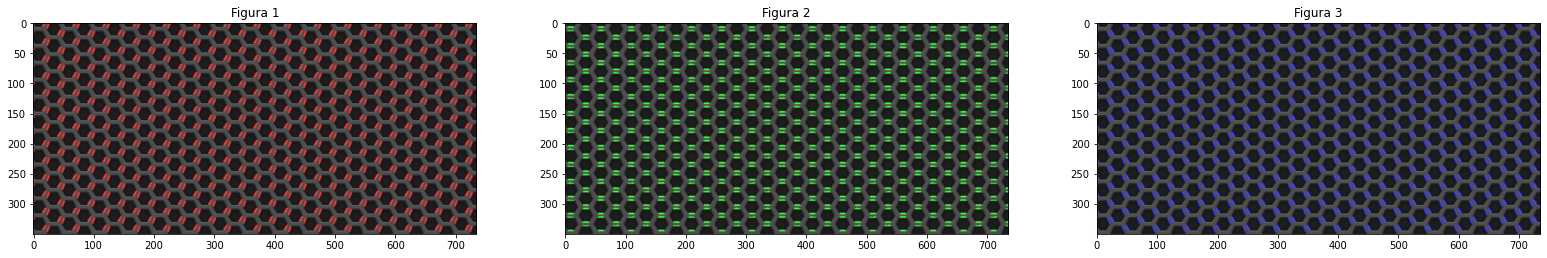

In [306]:
metalGrid = cv.imread('metalgrid.jpg', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1] # Cargo la imagen en RGB

desired_angle = 30
angle_tolerance = 10
percentil = 80
out30 = edge_detector(metalGrid, desired_angle, angle_tolerance, percentil, color = 'red')

desired_angle = 90
out90 = edge_detector(metalGrid, desired_angle, angle_tolerance, percentil, color = 'green')

desired_angle = 150
out150 = edge_detector(metalGrid, desired_angle, angle_tolerance, percentil, color = 'blue')

image_plot([out30, out90, out150], n_row = 1, n_col = 3, fig_size = (27, 9))

Text(0.5, 1.0, 'Imagen original')

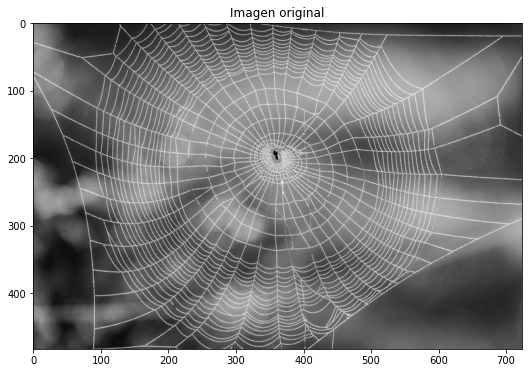

In [302]:
spyder = cv.imread('tela2.jpg', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1] # Cargo la imagen en RGB
gray = cv.cvtColor(spyder, cv.COLOR_RGB2GRAY) # Paso la imagen a escala de grises
fig = plt.figure(figsize=(15,6)), plt.imshow(gray, cmap = 'gray') # Grafico la imagen
plt.title('Imagen original')

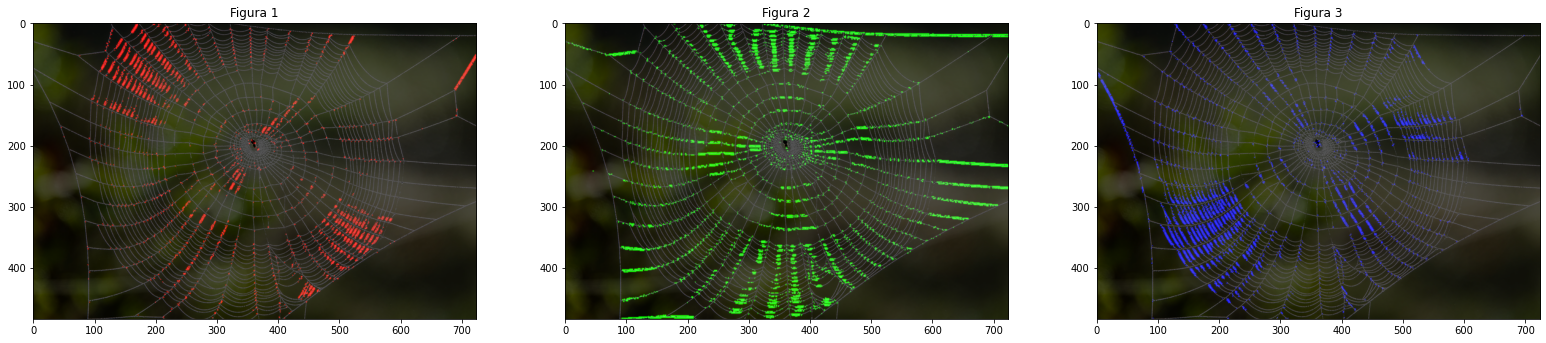

In [305]:
desired_angle = 30
angle_tolerance = 10
percentil = 80
out30 = edge_detector(spyder, desired_angle, angle_tolerance, percentil, color = 'red')

desired_angle = 90
out90 = edge_detector(spyder, desired_angle, angle_tolerance, percentil, color = 'green')

desired_angle = 150
out150 = edge_detector(spyder, desired_angle, angle_tolerance, percentil, color = 'blue')

image_plot([out30, out90, out150], n_row = 1, n_col = 3, fig_size = (27, 9))